# **Dataset**

Dataset: [COVID-19 World Vaccination Progress](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress?select=country_vaccinations.csv)

# **Description**

Analyze daily COVID-19 vaccination trends using a time series approach with the LSTM model

# **Data Preparation**

## Library Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.ticker as ticker

import plotly.graph_objects as go
from dash import Dash, callback_context, dcc, html
from dash.dependencies import Input, Output

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All datasets/country_vaccinations.csv')
df

country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
86507     Zimbabwe      ZWE  2022-03-25           8691642.0   
86508     Zimbabwe      ZWE  2022-03-26           8791728.0   
86509     Zimbabwe      ZWE  2022-03-27           8845039.0   
86510     Zimbabwe      ZWE  2022-03-28           8934360.0   
86511     Zimbabwe      ZWE  2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   
...                  ...                      ...                     ...   
86507          4814582.0                3473523.0                139213.0   
86508          4886242.0                3487962.0                100086.0   
86509          4918147.0                3493763.0                 53311.0   
86510          4975433.0                3501493.0                 89321.0   
86511          5053114.0                3510256.0                105369.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
0                     NaN                            0.00   
1                  1367.0                             NaN   
2                  1367.0                             NaN   
3                  1367.0                             NaN   
4                  1367.0                             NaN   
...                   ...                             ...   
86507             69579.0                           57.59   
86508             83429.0                           58.25   
86509             90629.0                           58.61   
86510            100614.0                           59.20   
86511            103751.0                           59.90   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                               0.00                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                NaN                                  NaN   
4                                NaN                                  NaN   
...                              ...                                  ...   
86507                          31.90                                23.02   
86508                          32.38                                23.11   
86509                          32.59                                23.15   
86510                          32.97                                23.20   
86511                          33.48                                23.26   

       daily_vaccinations_per_million  \
0                                 NaN   
1                                34.0   
2                                34.0   
3                                34.0   
4                                34.0   
...                               ...   
86507                          4610.0   
86508                          5528.0   
86509                          6005.0   
86510                          6667.0   
86511                          6874.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
cols_to_drop = ['iso_code', 'vaccines', 'source_name',
                'source_website', 'total_vaccinations_per_hundred',
                'people_vaccinated_per_hundred',
                'people_fully_vaccinated_per_hundred',
                'daily_vaccinations_per_million']
df = df.drop(cols_to_drop, axis=1)
df.head(3)

country        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 NaN                NaN   
2  Afghanistan  2021-02-24                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  
0                      NaN                     NaN                 NaN  
1                      NaN                     NaN              1367.0  
2                      NaN                     NaN              1367.0

# **Data Preprocessing**

In [ ]:
# Memisahkan kolom kategorikal dan numerik
categorical_cols = ['date', 'country']
numeric_df = df.drop(categorical_cols, axis=1)

In [ ]:
# Membuat objek imputer dan mengisi missing values dengan metode KNN
imputer = KNNImputer(n_neighbors=5)
numeric_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# numeric_imputed = numeric_df.fillna(numeric_df.mean())
# numeric_imputed['daily_vaccinations'] = numeric_df['daily_vaccinations'].fillna(numeric_df['daily_vaccinations'].mean())

In [ ]:
df_imputed = pd.concat([df[categorical_cols], numeric_imputed], axis=1)

In [ ]:
df_imputed.isnull().sum()

date                       0
country                    0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
daily_vaccinations_raw     0
daily_vaccinations         0
dtype: int64

Convert 'date' column to datetime format

In [ ]:
df_imputed['date'] = pd.to_datetime(df_imputed['date'])
df_imputed.set_index('date', inplace=True)

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86512 entries, 2021-02-22 to 2022-03-29
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  86512 non-null  object 
 1   total_vaccinations       86512 non-null  float64
 2   people_vaccinated        86512 non-null  float64
 3   people_fully_vaccinated  86512 non-null  float64
 4   daily_vaccinations_raw   86512 non-null  float64
 5   daily_vaccinations       86512 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.6+ MB


There are 40_634 daily_vaccinations in total

In [ ]:
df_imputed['daily_vaccinations'].nunique()

40634

## **Multiple time series plots**

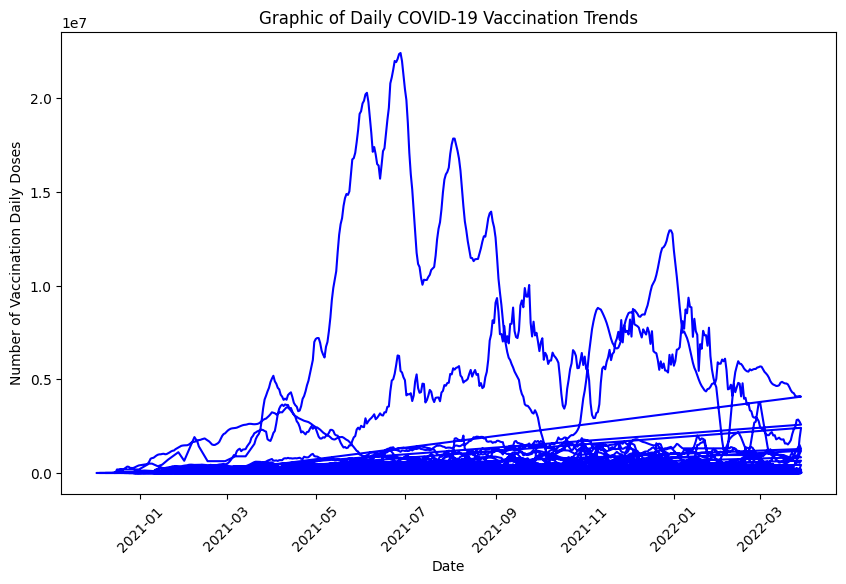

In [ ]:
# Plot grafik tren jumlah dosis harian vaksinasi COVID-19
plt.figure(figsize=(10, 6))
plt.plot(df_imputed.index, df_imputed['daily_vaccinations'], color='blue')
plt.title('Graphic of Daily COVID-19 Vaccination Trends')
plt.xlabel('Date')
plt.ylabel('Number of Vaccination Daily Doses')
plt.xticks(rotation=45)
plt.show()

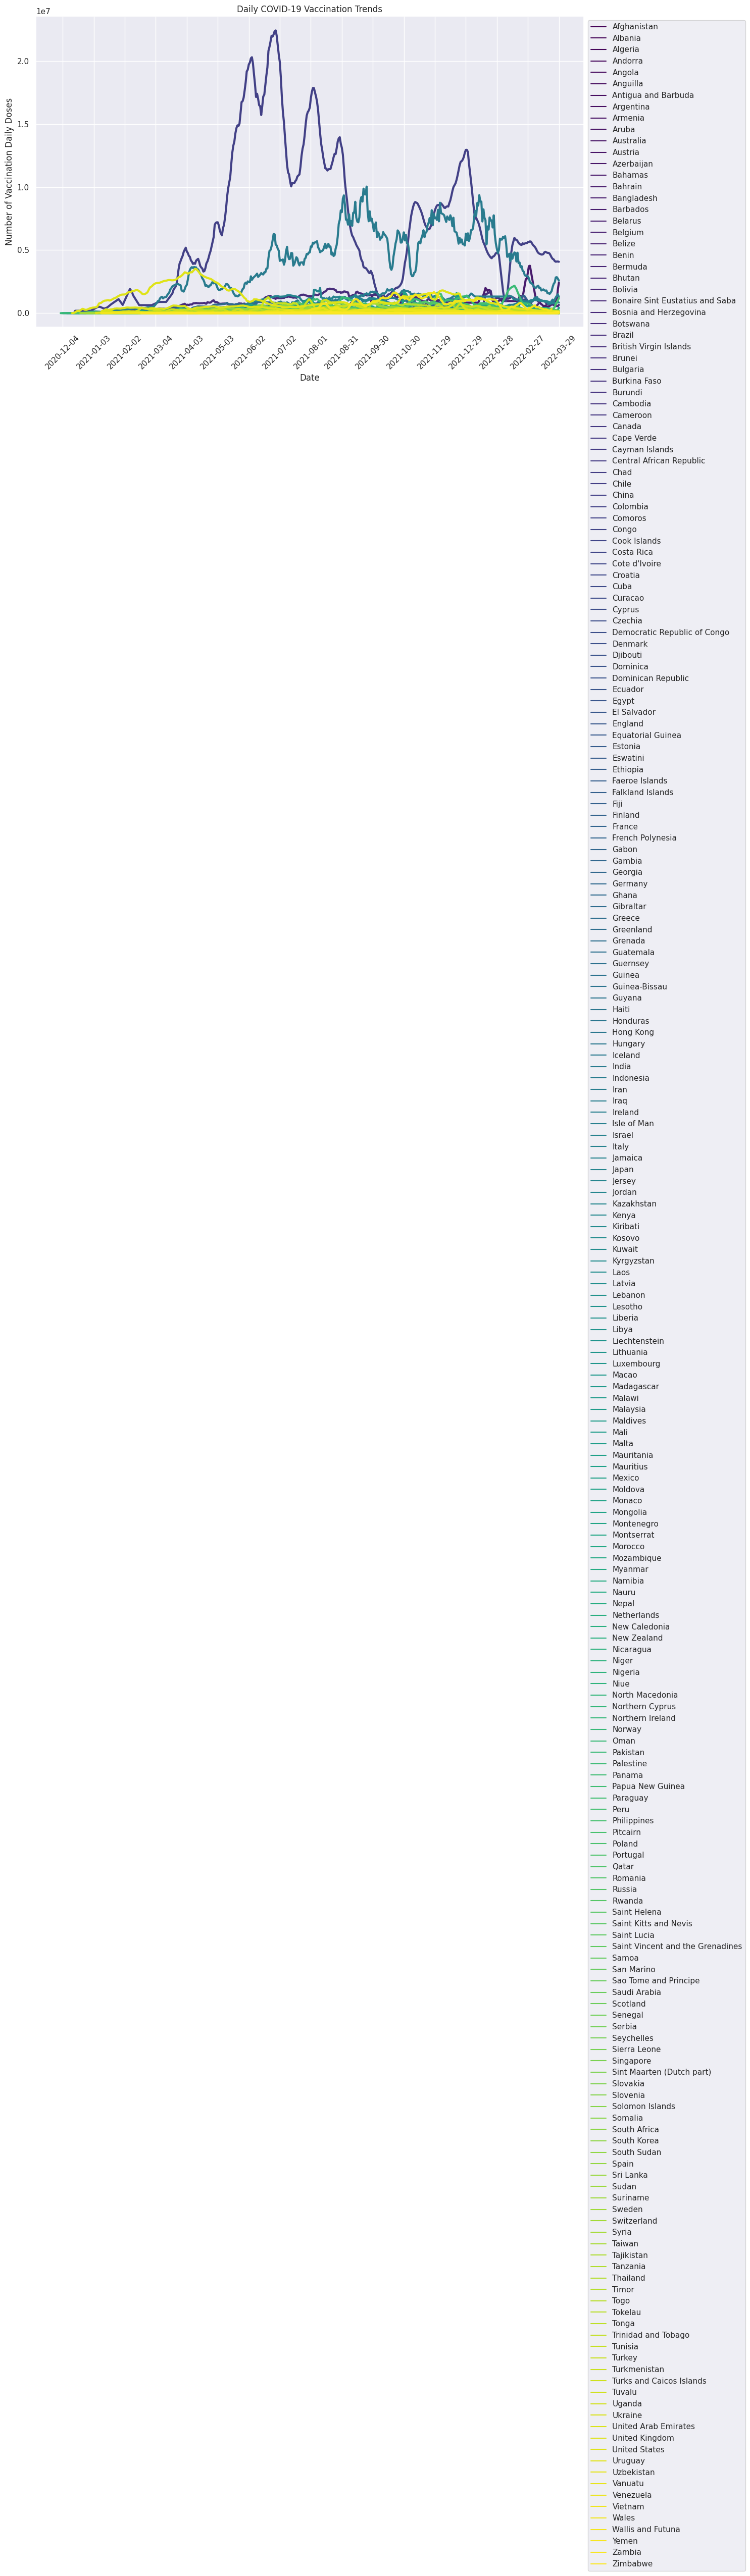

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_imputed, x=df_imputed.index, y='daily_vaccinations',
                  hue='country', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number of Vaccination Daily Doses')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily COVID-19 Vaccination Trends')
plt.show()

## **Addressing overlapping plots**

Check the country list

In [ ]:
list_country = sorted(list(set(df_imputed['country'])))
print(list_country)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia'

In [ ]:
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_country)).as_hex())

fig = go.Figure()
for d, p in zip(list_country, pal):
    fig.add_trace(go.Scatter(x=df_imputed.index[df_imputed['country'] == d],
                             y=df_imputed[df_imputed['country'] == d]['daily_vaccinations'],
                             name=d,
                             line_color=p,
                             fill=None))

fig.update_layout(title='Daily COVID-19 Vaccination Trends',
                  xaxis_title='Date',
                  yaxis_title='Number of Vaccination Daily Doses')
fig.show()

Membuat agar lebih interaktif dengan menambahkan 'tozeroy' pada atribut fill

In [ ]:
for d,p in zip(list_country, pal):
    fig.add_trace(go.Scatter(x=df_imputed.index[df_imputed['country'] == d],
                             y=df_imputed[df_imputed['country'] == d]['daily_vaccinations'],
                             name=d,
                             line_color=p,
                             fill='tozeroy')) #tozeroy

fig.update_layout(title='Daily COVID-19 Vaccination Trends',
                  xaxis_title='Date',
                  yaxis_title='Number of Vaccination Daily Doses')

fig.show()

Mengatur agar plotnya di-reset ketika daftar list_country dipilih, dengan menggunakan fungsi callback pada library Plotly

In [ ]:
app = Dash(__name__)

@app.callback(
    Output('graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    fig = go.Figure()

    for d, p in zip(list_country, pal):
        if selected_country is None or d == selected_country:
            fig.add_trace(go.Scatter(x=df_imputed.index[df_imputed['country'] == d],
                                     y=df_imputed[df_imputed['country'] == d]['daily_vaccinations'],
                                     name=d,
                                     line_color=p,
                                     fill='tozeroy'))

    fig.update_layout(title='Daily COVID-19 Vaccination Trends',
                      xaxis_title='Date',
                      yaxis_title='Number of Vaccination Daily Doses')

    return fig

app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in list_country],
        placeholder="Select a country",
        multi=False
    ),

    dcc.Graph(id='graph')
])

if __name__ == '__main__':
   app.run_server()

<IPython.core.display.Javascript object>

In [ ]:
# features = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
# X = df_imputed[features]

In [ ]:
# y = df_imputed['daily_vaccinations_raw']

In [ ]:
dates = df['date'].values
daily = df_imputed['daily_vaccinations'].values

In [ ]:
scaler = MinMaxScaler()
scaled_daily = scaler.fit_transform(daily.reshape(-1, 1))

X_train, X_val, y_train, y_val = train_test_split(
    dates[:-int(len(dates)*0.2)], scaled_daily[:-int(len(scaled_daily)*0.2)],
    test_size=0.2,
    shuffle=False,
)

print('Total X_train:', len(X_train),'\nTotal X_test:', len(X_val))

Total X_train: 55368 
Total X_test: 13842


In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

Menetapkan arsitektur dan pelatihan model

In [ ]:
train_data = windowed_dataset(y_train.reshape(-1),
                              window_size=60, batch_size=100,
                              shuffle_buffer=1000)
val_data = windowed_dataset(y_val.reshape(-1),
                              window_size=60, batch_size=100,
                              shuffle_buffer=1000)

# **Time Series Modeling**

## Build the LSTM model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(120, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(120),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])

## Callback

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.10):
      self.model.stop_training = True
      print('\n\nCallback called --- Done training!')
      print(" MAE < 10% ".center(33, '-'), '\n\n')

custom_callback = CustomCallback()

## Models Training

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    verbose=2,
    callbacks=[custom_callback]
)

Epoch 1/50


Callback called --- Done training!
----------- MAE < 10% ----------- 


554/554 - 36s - loss: 9.7781e-04 - mae: 0.0072 - accuracy: 0.0057 - val_loss: 3.2731e-05 - val_mae: 0.0030 - val_accuracy: 0.0086 - 36s/epoch - 64ms/step


# **Data Visualization**

## MAE (Mean Absolute Error) Graph

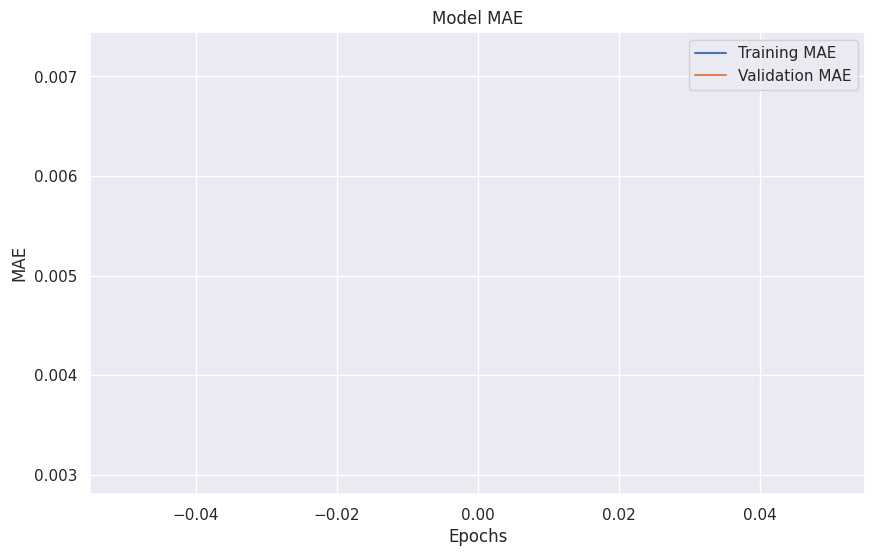

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Accuracy Graph

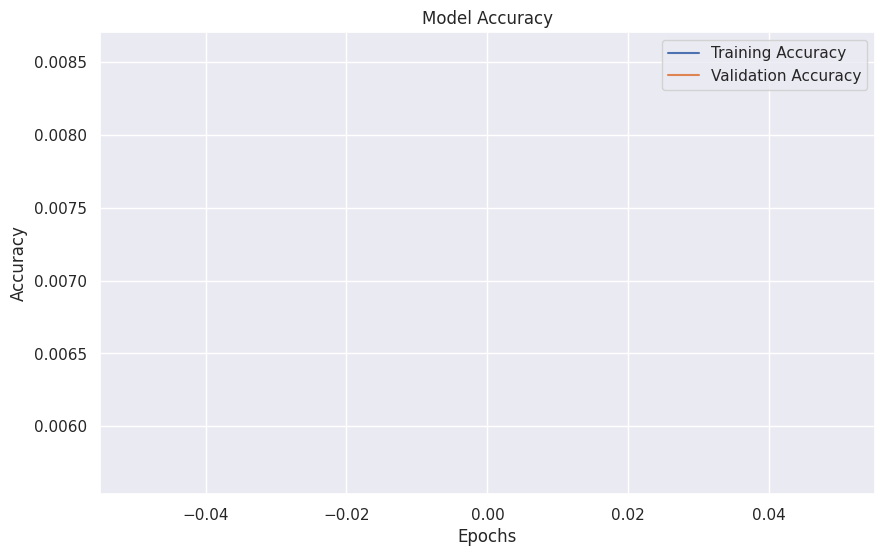

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss Graph

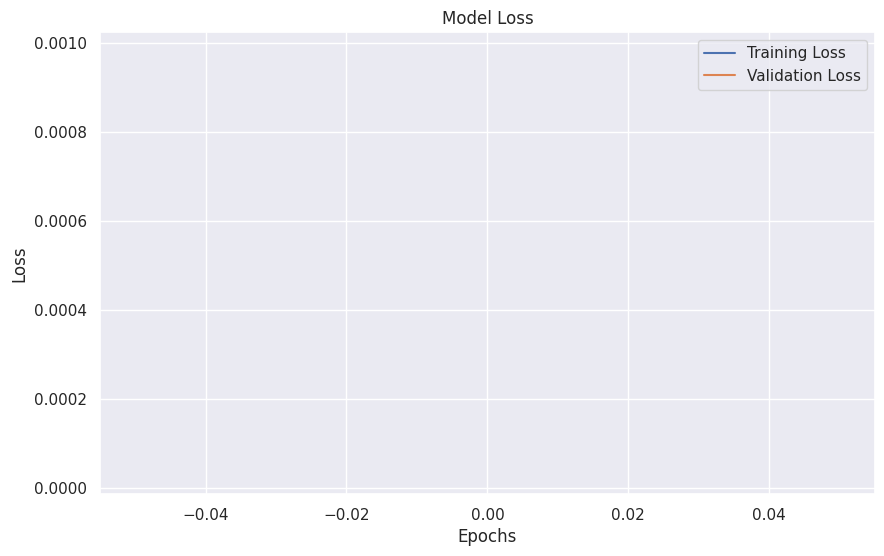

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()